In [1]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
from Cores import Cores
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'

from MEM_class import MEM

from synthData_Gen import SyntheticData_Gen

In [2]:
s1_instance = SyntheticData_Gen(AR1_coef = 0.3, AR1_var = 120, AR1_dt = 0.001, AR1_N = 20000, diff_len=0.084, dt_sample = 0.025, meas_noise = 0.07)
s1 = s1_instance()

In [3]:
plotFig = False
if plotFig:
    figSynth, axSynth = plt.subplots(figsize=(12,6))
    axSynth.set(xlim=(0,20), xlabel='Depth [m]', ylabel='$\delta^{18}$O [\permil]')
    axSynth.plot(s1[2],s1[3],linewidth=0.8, color='blue', alpha=0.9,label='Before diffusion')
    axSynth.plot(s1[4],s1[5], color='black', label='After diffusion')
    axSynth.legend()

In [4]:
if plotFig:
    figSynthDiff, axSynthDiff = plt.subplots(figsize=(12,6))
    axSynthDiff.set(xlim=(0,20), xlabel='Depth [m]', ylabel='$\delta^{18}$O [\permil]', title='Synthetic data, after diffusion')
    axSynthDiff.plot(s1[4],s1[5], color='black')


In [5]:
from MEM_class import MEM

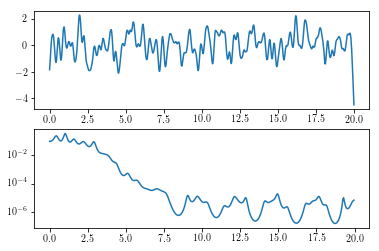

In [6]:
MEM_inst_Synth = MEM(t_data = s1[4], y_data = s1[5], M = 70)
PSD_Synth = MEM_inst_Synth(t_data = s1[4], y_data = s1[5], M = 70, N = 1000)

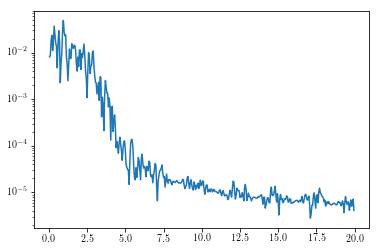

In [7]:
t = s1[4]
y = s1[5]
N = 800

dt = t[1] - t[0]
w = np.fft.fftfreq(N, dt)
A = np.fft.fft(y, n = N)


aS2 = np.abs(A)**2

P = (aS2[np.where(w>=0)] + aS2[np.where(w<0)][::-1]) / N**2
w_pos = w[np.where(w>0)]


plt.semilogy(w_pos,P[1:])


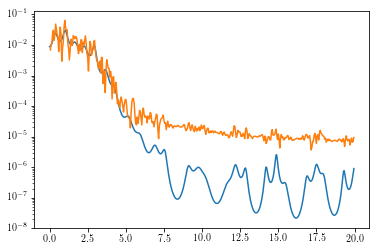

In [18]:
from SpectralAnalysis import SignalToF

s_inst = SignalToF(t = s1[4], y = s1[5])
test = s_inst.mem(M = 50, N = 1000)
test2 = s_inst.fft_psd(N = 800)
plt.semilogy(test[0], test[1]/(sum(test[1])))
plt.semilogy(test2[0], test2[1][:-1]/(sum(test2[1][:-1])))

In [32]:
def testfunc(p, **kwargs):
    print(f'Normal variable: {p}')
    print(list(kwargs.keys()))
    if list(kwargs.keys()):
        print('yes')
    for key, arg in kwargs.items(): 
        print(f'{key}: {arg}')
    return 

testfunc('hello', name='Lars', food='pizza', wood='oak')

Normal variable: hello
['name', 'food', 'wood']
yes
name: Lars
food: pizza
wood: oak
